In [1]:
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import ConfusionMatrixDisplay

foot_data = pd.read_csv('ML_dataset.csv')
now2021 = foot_data[len(foot_data)-205:]
extra2021 = pd.concat([now2021[0:59],now2021[69:138],now2021[148:196]])
test2021 = pd.concat([now2021[59:69],now2021[138:148],now2021[196:205]])
test2021.to_csv("2021test_had_teams.csv")
foot_data[len(foot_data)-69:].to_csv("2021test.csv")

foot_data = foot_data[['Results',
                'days_home','days_away','distance(km)','spi1','spi2','importance1','importance2',
               'Home_goals_rolling', 'Away_goals_rolling', 'Home_conceded_rolling', 'Away_conceded_rolling', 
                'Home_xG_rolling', 'Away_xG_rolling', 'Home_xGA_rolling', 'Away_xGA_rolling', 
                'Home_nsxG_rolling', 'Away_nsxG_rolling', 'Home_nsxGA_rolling', 'Away_nsxGA_rolling',
                'HM1', 'HM2', 'HM3',
                'AM1', 'AM2', 'AM3']]

nan_value = float("NaN")

foot_data.replace("", nan_value, inplace=True)

foot_data.dropna(subset=['importance1','importance2','Home_nsxG_rolling',
                         'Away_nsxG_rolling', 'Home_nsxGA_rolling', 'Away_nsxGA_rolling'],inplace=True)
                 

# Separate the data into sets for testing the model
foot_data.to_csv("AutoMLtest.csv")
now2021 = foot_data[len(foot_data)-205:]
extra2021 = pd.concat([now2021[0:59],now2021[69:138],now2021[148:196]])
test2021 = pd.concat([now2021[59:69],now2021[138:148],now2021[196:205]])
pre2021 = pd.concat([foot_data[:len(foot_data)-205],extra2021])

test2021.to_csv("2021test_had.csv")

foot_data = pre2021
X_all = foot_data.drop(columns = ['Results'])
y = foot_data['Results']
 
def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''

    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
        
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)

X_train, X_test, y_train, y_test = train_test_split(X_all,y, test_size = 0.3)



In [2]:
from sklearn.tree import DecisionTreeClassifier

#Prediciton with DecisionTreeClassifier

model = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('AccuracyDCT: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
print("AccuracyDCT: % 2f%%" % (score * 100.0))

print(classification_report(y_test, predictions))

# test_data = pd.read_csv('test.csv')

# test_data = test_data[['Results','HTP','ATP','HM1','HM2','HM3','AM1','AM2','AM3','HTGD',
#             'ATGD','HTxGD','ATxGD','DiffFormPts']]

# X_test = test_data.drop(columns = ['Results'])

# X_test = preprocess_features(X_test)
# model.predict(X_test)


AccuracyDCT: 0.421 (0.019)
AccuracyDCT:  42.986621%
              precision    recall  f1-score   support

           A       0.42      0.40      0.41       704
           D       0.25      0.25      0.25       572
           H       0.53      0.55      0.54      1041

    accuracy                           0.43      2317
   macro avg       0.40      0.40      0.40      2317
weighted avg       0.43      0.43      0.43      2317



In [10]:
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#XGboost model
seed = 27
test_size = 0.4
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=test_size, random_state=seed)

model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('AccuracyXGB: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)
predictions = model_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test,pred)
print("AccuracyXGB: % 2f%%" % (accuracy_xgb * 100.0))

print(classification_report(y_test, predictions))

# cm = confusion_matrix(y_test, predictions)

# # Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
# cm_df = pd.DataFrame(cm,
#                      index = ['AWAY','DRAW','HOME'], 
#                      columns = ['AWAY','DRAW','HOME'])

# plt.figure(figsize=(10,6))

# sns.heatmap(cm_df,annot=True,cmap='Blues', fmt='d')

# plt.title('Confusion Matrix')
# plt.ylabel('Actual Values')
# plt.xlabel('Predicted Values')

# plt.show()

AccuracyXGB: 0.514 (0.024)
[09:15:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Kofi0\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


AccuracyXGB:  49.482201%
              precision    recall  f1-score   support

           A       0.49      0.46      0.48       936
           D       0.28      0.16      0.20       782
           H       0.55      0.71      0.62      1372

    accuracy                           0.49      3090
   macro avg       0.44      0.44      0.43      3090
weighted avg       0.46      0.49      0.47      3090



In [13]:
#Support Vector Machine Classifier
from sklearn import svm


model = svm.SVC()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('AccuracySVM: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


clf = svm.SVC()
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
score = accuracy_score(y_test, predictions)

print(classification_report(y_test, predictions))


print("AccuracySVM: % 2f%%" % (score * 100.0))

AccuracySVM: 0.519 (0.014)
              precision    recall  f1-score   support

           A       0.56      0.36      0.44       936
           D       0.00      0.00      0.00       782
           H       0.50      0.90      0.64      1372

    accuracy                           0.51      3090
   macro avg       0.35      0.42      0.36      3090
weighted avg       0.39      0.51      0.42      3090

AccuracySVM:  50.873786%


C:\Users\Kofi0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kofi0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kofi0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AccuracyGBM: 0.526 (0.016)
AccuracyGBM:  52.438498%
              precision    recall  f1-score   support

           A       0.52      0.53      0.52       741
           D       0.30      0.06      0.10       584
           H       0.54      0.80      0.65       992

    accuracy                           0.52      2317
   macro avg       0.46      0.46      0.42      2317
weighted avg       0.48      0.52      0.47      2317



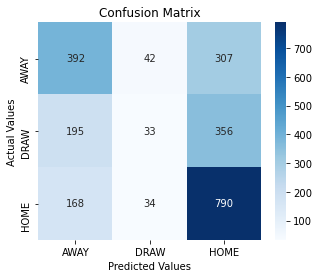

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('AccuracyGBM: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

model_gbm = GradientBoostingClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
print("AccuracyGBM: % 2f%%" % (score * 100.0))

print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['AWAY','DRAW','HOME'], 
                     columns = ['AWAY','DRAW','HOME'])

plt.figure(figsize=(5,4))

sns.heatmap(cm_df,annot=True,cmap='Blues', fmt='d')

plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

plt.show()

AccuracyBayes: 0.509 (0.019)
AccuracyBayes:  51.834268%
              precision    recall  f1-score   support

           A       0.52      0.57      0.54       741
           D       0.31      0.24      0.27       584
           H       0.60      0.64      0.62       992

    accuracy                           0.52      2317
   macro avg       0.48      0.48      0.48      2317
weighted avg       0.50      0.52      0.51      2317



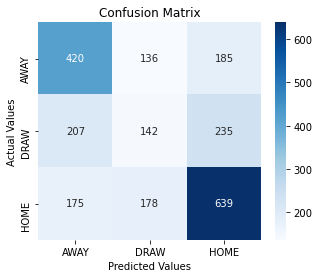

In [3]:
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

model = GaussianNB()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('AccuracyBayes: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


model = GaussianNB()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
print("AccuracyBayes: % 2f%%" % (score * 100.0))

print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['AWAY','DRAW','HOME'], 
                     columns = ['AWAY','DRAW','HOME'])

plt.figure(figsize=(5,4))

sns.heatmap(cm_df,annot=True,cmap='Blues', fmt='d')

plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

plt.show()


In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

test21 = pd.read_csv("2021test_had.csv")
file_stuff = pd.read_csv("2021test_had_teams.csv")
X_21test = test21.drop(columns = ['Results','Unnamed: 0'])
y = foot_data['Results']
 
def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''

    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
        
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_21test = preprocess_features(X_21test)
model = GaussianNB()
model.fit(X_train,y_train)

y2 = model.predict(X_21test)

file_stuff = file_stuff[['HomeTeam','AwayTeam','Results']]
file_stuff.insert(3,'Model_pred',y2)
display(file_stuff)

,HomeTeam,AwayTeam,Results,Model_pred
0,Leicester,Chelsea,A,A
1,Norwich,Southampton,H,A
2,Aston Villa,Brighton,H,A
3,Wolverhampton Wanderers,West Ham,H,A
4,Newcastle United,Brentford,D,A
5,Burnley,Crystal Palace,D,A
6,Watford,Manchester United,H,A
7,Liverpool,Arsenal,H,H
8,Manchester City,Everton,H,H
9,Tottenham,Leeds,H,D
